<a href="https://colab.research.google.com/github/bar371/Malware-Detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from torchvision import datasets , transforms
from matplotlib import pyplot as plt
from random import randint
import numpy as np
from collections import defaultdict
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual


In [ ]:
# !pip install bioinfokit
# !pip install bioinfokit --upgrade

In [2]:
!git clone https://github.com/bar371/Malware-Detection.git

fatal: destination path 'Malware-Detection' already exists and is not an empty directory.


In [3]:
IM_SHAPE = (224, 224)
IM_DIM = (224,224,3)
data_transform = transforms.Compose([
        transforms.Resize(IM_SHAPE),
        transforms.ToTensor(),
    ])

images_dataset = datasets.ImageFolder(root="Malware-Detection/data/malimg_paper_dataset_imgs", transform=data_transform)


In [4]:
print(images_dataset.classes)
class_name_2_index = {name : i for i, name in enumerate(images_dataset.classes) }
class_index_2_name = {i : name for i, name in enumerate(images_dataset.classes) }


['.ipynb_checkpoints', 'Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A', 'benign']


In [ ]:
from sklearn.manifold import TSNE
img_len = range(len(images_dataset))
# choices = np.random.choice(range(len(images_dataset)),100)
# X = np.array([images_dataset[i][0].detach().cpu().numpy() for i in img_len])
y = np.array([images_dataset[i][1] for i in img_len])

In [ ]:
label_dict = defaultdict(int)
label_list = []
color_class = []

MAX_SAMPLES = 80
for i,c in enumerate(y):
  if label_dict[c] < MAX_SAMPLES:
    label_dict[c] += 1
    label_list.append(i)
    color_class.append(c)
from collections import Counter
print(Counter(color_class))

Counter({0: 80, 1: 80, 2: 80, 3: 80, 4: 80, 5: 80, 6: 80, 7: 80, 8: 80, 9: 80, 10: 80, 11: 80, 12: 80, 13: 80, 14: 80, 15: 80, 16: 80, 17: 80, 18: 80, 19: 80, 20: 80, 21: 80, 22: 80, 23: 80, 24: 80})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


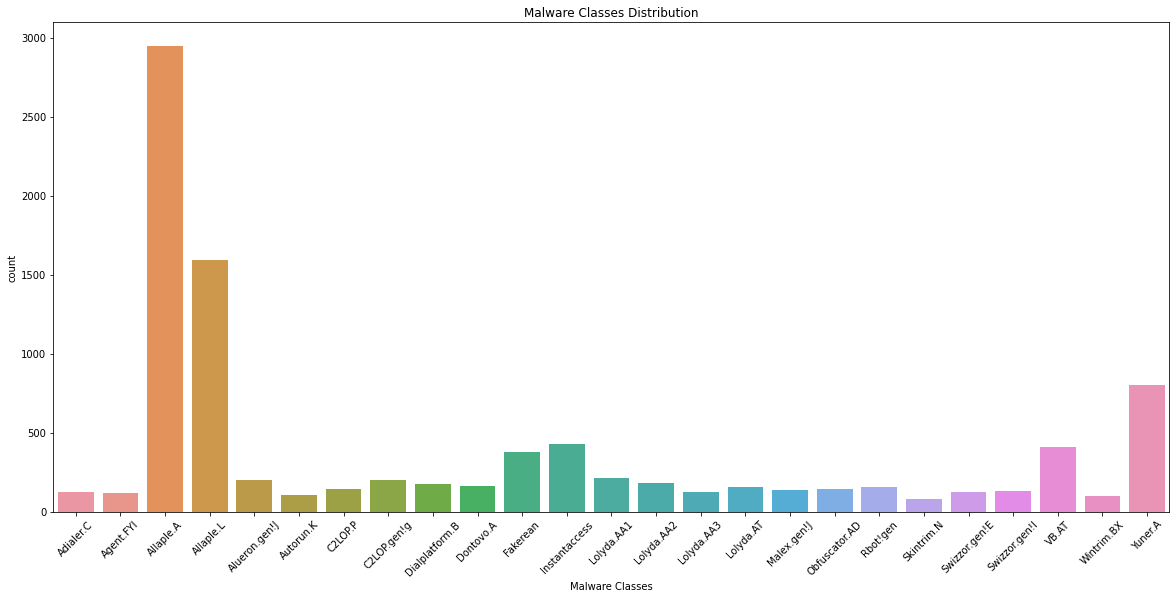

In [ ]:
sns.countplot(y)
figure = plt.gcf()
figure.set_size_inches(20, 9)
plt.title("Malware Classes Distribution")
plt.xlabel("Malware Classes")
plt.xticks(ticks=range(0,25), labels=images_dataset.classes,rotation=45)
plt.show()

In [ ]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files):
    fig = figure()
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
      cur_img = list_of_files[i]
      a=fig.add_subplot(1,number_of_files,i+1)
      # figure = plt.gcf()
      plt.title("Binary Image of malware of class" + class_index_2_name[cur_img[1]])
      plt.imshow(cur_img[0].view(IM_DIM))
      plt.tight_layout()
      axis('off')

In [ ]:
def random_show_from_chosen_class(class_name, num_to_sample=1):
  cur_sampled = 0
  while cur_sampled < num_to_sample:
    ind = randint(0, len(images_dataset)-1)
    if class_index_2_name[images_dataset[ind][1]] == class_name:
      cur_sampled += 1
      figure = plt.gcf()
      figure.set_size_inches(16, 24)
      plt.imshow(images_dataset[ind][0].view(IM_DIM))
      plt.title("Binary Image id:{} of malware of class {}".format(ind,class_name))
      plt.show()
      print()

In [ ]:
interact(lambda class_name,num_to_sample : random_show_from_chosen_class(class_name=class_name, num_to_sample=num_to_sample), class_name = list(images_dataset.classes), num_to_sample=list(range(1,5)))


interactive(children=(Dropdown(description='class_name', options=('Adialer.C', 'Agent.FYI', 'Allaple.A', 'Alla…

<function __main__.<lambda>>

In [ ]:
def sample_random_images_from_diff_classes(n_classes, show=True):
  print(images_dataset)
  diff_label_types = set()
  imgs_to_return = []
  while len(diff_label_types) != n_classes:
    ind = randint(0, len(images_dataset)-1)
    # print(images_dataset[ind])
    class_n = str(images_dataset[ind][1])
    if class_n not in diff_label_types:
      diff_label_types.add(class_n)
      cur_image = images_dataset[ind][0]
      imgs_to_return.append(cur_image)
      if show:
        plt.imshow(cur_image.view(IM_DIM))
        plt.title("Binary Image of malware of class" +  class_index_2_name[int(class_n)])
        plt.show()
  return imgs_to_return

Dataset ImageFolder
    Number of datapoints: 9339
    Root location: Malware-Detection/data/malimg_paper_dataset_imgs
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )


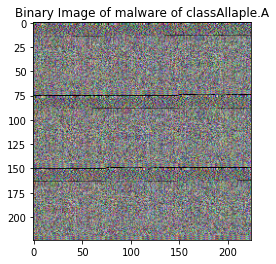

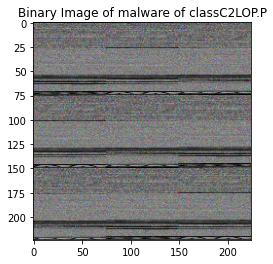

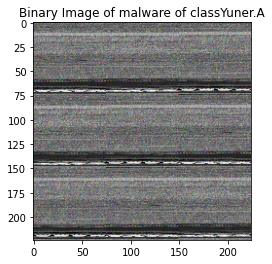

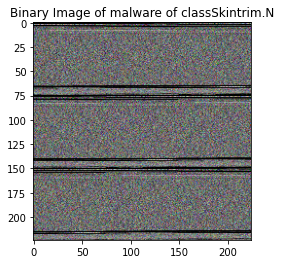

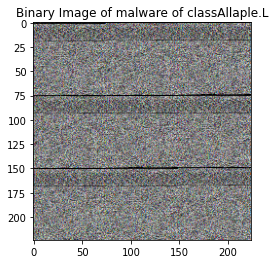

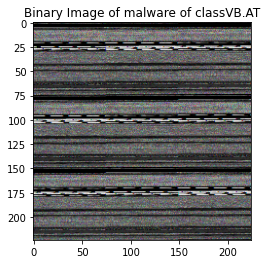

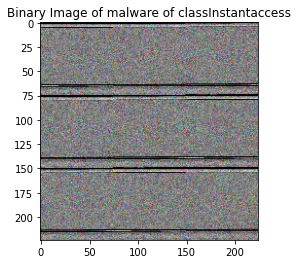

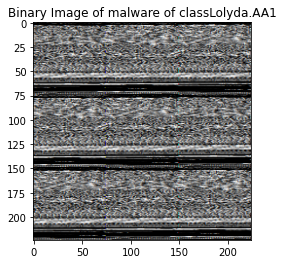

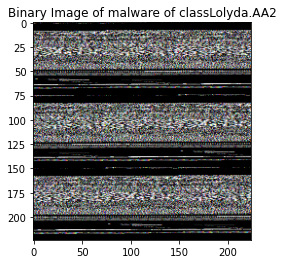

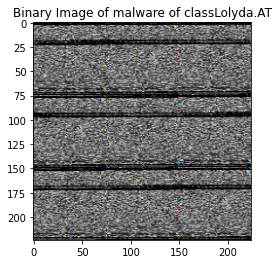

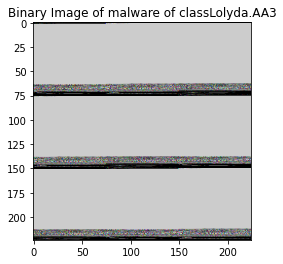

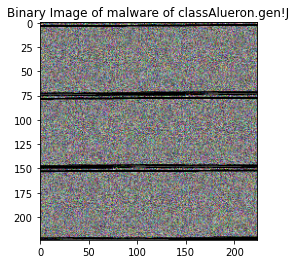

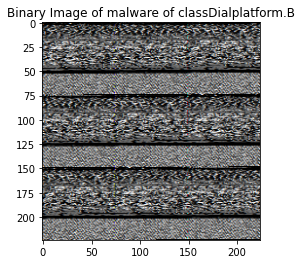

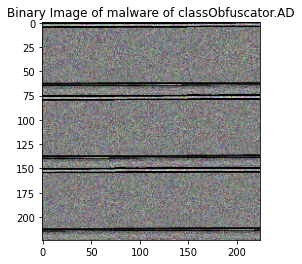

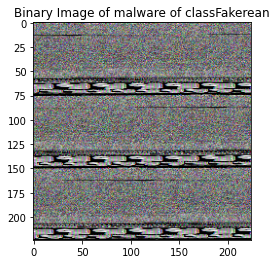

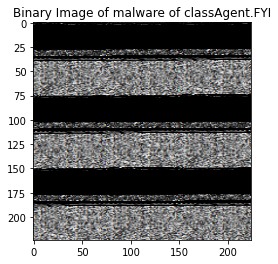

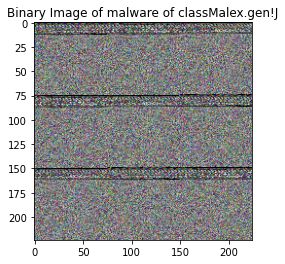

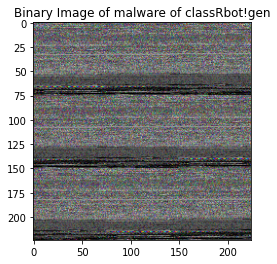

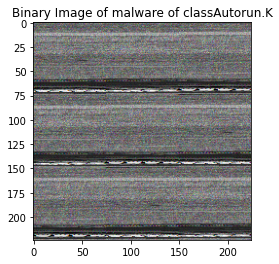

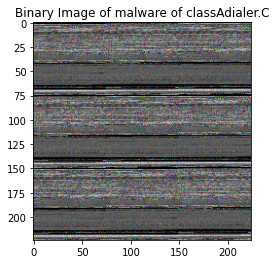

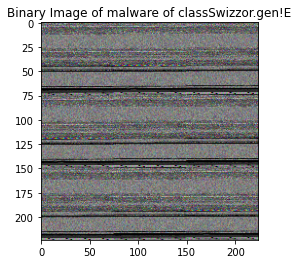

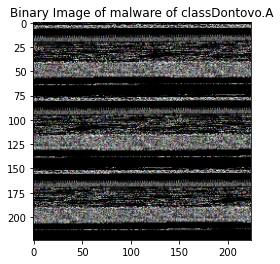

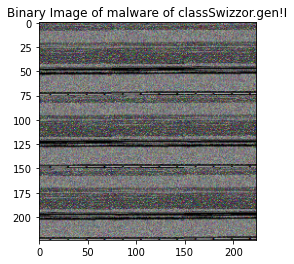

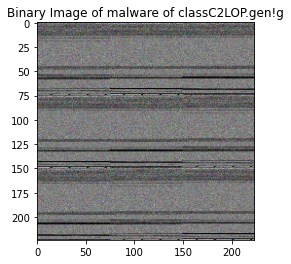

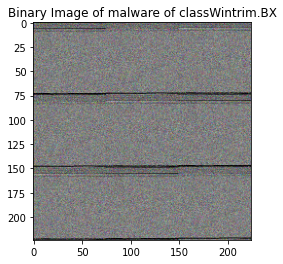

In [ ]:
random_pics = sample_random_images_from_diff_classes(25, True) # show random pictures from each class

In [ ]:
def create_mean_images_from_classes(images_dataset, show=False):
  label_dict = dict()
  samples_len = dict()
  spliced_data = dict()
  for img in images_dataset:
    if img[1] not in label_dict.keys():
      label_dict[img[1]] = img[0]
      samples_len[img[1]] = 1
      spliced_data[img[1]] = []
    else:
      label_dict[img[1]] += img[0]
      samples_len[img[1]] += 1
      spliced_data[img[1]].append(img[0])

  for class_num, to_mean in label_dict.items():
      avg_image = (to_mean / samples_len[class_num]).reshape(IM_DIM)
      label_dict[class_num] = avg_image
      if show:
        plt.title("Mean Image of class " + class_index_2_image[class_num])
        plt.imshow(avg_image.view(IM_DIM), cmap='gray')  # print(len()
        plt.show()
  return label_dict, spliced_data

In [ ]:
mean_dict, spliced_data = create_mean_images_from_classes(images_dataset, False)

In [ ]:
def present_diff_mean_and_var(mean_dict:dict, spliced_data:dict, class_x:str, class_y:str):
  _create_differntial_mean(mean_dict, class_x, class_y)
  _create_differntial_varience(spliced_data, class_x, class_y)

def _create_differntial_mean(mean_dict:dict, class_x:str, class_y:str):
  contrast_mean = mean_dict[class_name_2_index[class_x]] - mean_dict[class_name_2_index[class_y]]
  contrast_mean = contrast_mean.reshape((336, 448))
  plt.title("Contrast Mean of class {} and class {} ".format(class_x, class_y))
  figure = plt.gcf()
  figure.set_size_inches(16, 24)
  plt.imshow(contrast_mean.view((336, 448)), cmap='bwr')  # print(len()
  plt.show()
  
def _create_differntial_varience(spliced_data:dict, class_x, class_y):
  x_ind = class_name_2_index[class_x]
  y_ind = class_name_2_index[class_y]
  x = np.array([spliced_data[x_ind][i].detach().cpu().numpy() for i in range(len(spliced_data[x_ind]))]).var(axis=0)
  y = np.array([spliced_data[y_ind][i].detach().cpu().numpy() for i in range(len(spliced_data[y_ind]))]).var(axis=0)
  contrast_var = x - y
  contrast_var = contrast_var.reshape((336, 448))

  # contrast_var = contrast_var.reshape((336, 448))
  plt.title("Contrast Var of class {} and class {} ".format(class_x, class_y))
  figure = plt.gcf()
  figure.set_size_inches(16, 24)
  plt.imshow(contrast_var, cmap='bwr')  # print(len()
  plt.show()

In [ ]:
print("view Constract Diff from class1 to class2 - Blue lines show similarty, red show discrepancy")
interact(lambda class1,class2 : present_diff_mean_and_var(mean_dict=mean_dict,spliced_data=spliced_data, class_x=class1, class_y=class2), class1 = images_dataset.classes  , class2=images_dataset.classes)

view Constract Diff from class1 to class2 - Blue lines show similarty, red show discrepancy


interactive(children=(Dropdown(description='class1', options=('Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.…

<function __main__.<lambda>>

In [ ]:
  # np.array([spliced_data[0][i].detach().cpu().numpy() for i in range(len(spliced_data[0]))]).var(axis=0)

In [ ]:
from collections import Counter
X = np.array([images_dataset[i][0].detach().cpu().numpy() for i in label_list])


In [ ]:
X_2dim = X.reshape(len(X), (3*224*224))
# np.random.choice(np.array([images_dataset[i][0].detach().cpu().numpy() for i in range(len(images_dataset))]).reshape(9339, (3*224*224)), 100)
tsne_em  =TSNE(n_components=2, perplexity=30.0,  n_iter=5000, verbose=1).fit_transform(X_2dim)
# from bioinfokit.visuz import cluster
# cluster.tsneplot(score=tsne_em)
# plt.show()


[t-SNE] Computing 91 nearest neighbors...


KeyboardInterrupt: ignored

In [ ]:
# from bioinfokit.visuz import cluster
# cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )
# plt.tight_layout()
# plt.show()
figure = plt.gcf()
figure.set_size_inches(24, 18)
# print(tsne_em[:, 0])
plt.scatter(tsne_em[:, 0], tsne_em[:, 1], c=color_class, cmap=plt.cm.get_cmap("gist_ncar", len(color_class)),edgecolors="black")
plt.xlim(-100,100)
plt.ylim(-100,100)
# plt.clim(-0.5, len(color_class)-0.5)
# cbar = plt.colorbar(ticks=range(len(set(color_class))))
# cbar.ax.set_yticklabels(color_class)          
plt.show()